In [43]:
from models import *
from initializers import *
import models
import importlib
importlib.reload(models)

def ask_if_continue():
    while True:
        answer = input("Continue? [y/n] ")
        if answer == "y":
            return True
        elif answer == "n":
            return False

def train_momentum(model, epoch_counts, learning_rates, lambdas, report_interval=100, batch_size=None):
    for i in range(len(epoch_counts)):
        for j in range(10):
            model.train(epochs=epoch_counts[i],
                        learning_rate=learning_rates[i],
                        batch=True,
                        optimizer="momentum",
                        momentum_lambda=lambdas[i],
                        report_interval=report_interval,
                        batch_size=batch_size,
                        save_till_best=True)
        if not ask_if_continue():
            break
    model.plot()

def train_rmsprop(model, epoch_counts, learning_rates, rms_beta, report_interval=100, batch_size=None):
    for i in range(len(epoch_counts)):
        model.train(epochs=epoch_counts[i],
                    learning_rate=learning_rates[i],
                    batch=True,
                    optimizer="rmsprop",
                    rms_beta=rms_beta,
                    report_interval=report_interval,
                    batch_size=batch_size)
    model.plot()

## SGD with momentum

Model age: 10	MSE on train set: 43.91	MSE on test set: 301.34
Model age: 20	MSE on train set: 9.93	MSE on test set: 138.43
Model age: 30	MSE on train set: 12.49	MSE on test set: 74.31
Model age: 40	MSE on train set: 2.1	MSE on test set: 54.95
Model age: 50	MSE on train set: 1.05	MSE on test set: 46.92
Model age: 60	MSE on train set: 0.81	MSE on test set: 39.44
Model age: 70	MSE on train set: 0.51	MSE on test set: 31.96
Model age: 80	MSE on train set: 0.44	MSE on test set: 30.54
Model age: 90	MSE on train set: 0.54	MSE on test set: 29.15
Model age: 100	MSE on train set: 0.27	MSE on test set: 26.13
Model age: 110	MSE on train set: 0.28	MSE on test set: 26.33
Model age: 120	MSE on train set: 0.29	MSE on test set: 24.51
Model age: 130	MSE on train set: 0.26	MSE on test set: 23.97
Model age: 140	MSE on train set: 0.35	MSE on test set: 24.23
Model age: 150	MSE on train set: 0.52	MSE on test set: 21.41
Model age: 160	MSE on train set: 0.25	MSE on test set: 21.66
Model age: 170	MSE on train se

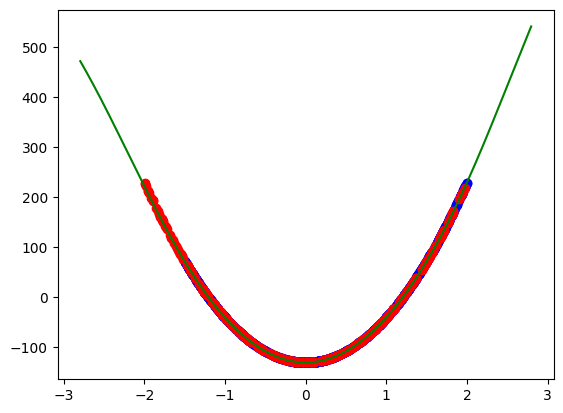

AttributeError: 'ModelHistory' object has no attribute 'best_test_mse_age'

In [ ]:
dataset_name = "square-large"
arch = MLPArchitecture(1, [150], 1)
model_momentum = MLP(architecture=arch, dataset_name=dataset_name, initializer=XavierUniformInitializer(), activation_func=Sigmoid())
layer = model_momentum.layers[0]

epoch_length = 200
epoch_counts = [epoch_length, epoch_length, epoch_length, epoch_length, epoch_length, epoch_length]
learning_rates = [0.1, 0.1, 0.1, 0.05, 0.05, 0.05]
lambdas = [0.3, 0.6, 0.8, 0.6, 0.8, 0.6]

train_momentum(model=model_momentum,
               epoch_counts=epoch_counts,
               learning_rates=learning_rates,
               lambdas=lambdas,
               report_interval=10,
               batch_size=1)


--------------------
Reverting to best model at age 3541
Best model MSE: 1.01
--------------------


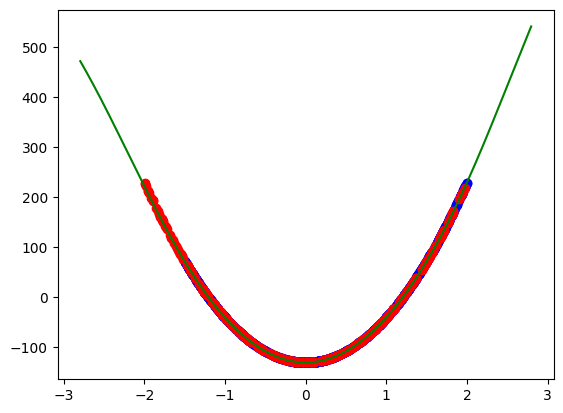

MSE on train set: 0.0	MSE on test set: 1.43


In [56]:
model_momentum.revert_to_best()
model_momentum.plot()
model_momentum.evaluate()

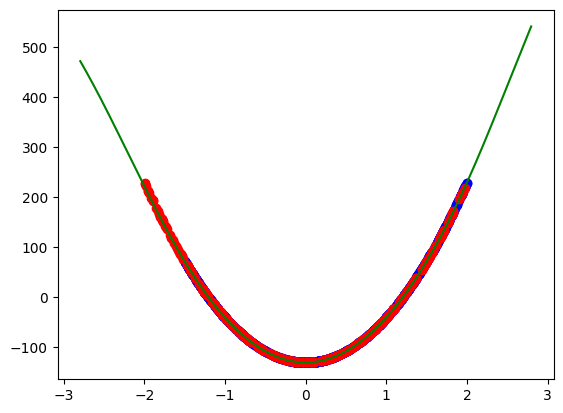

MSE on train set: 0.0	MSE on test set: 1.43


3541

In [51]:
import copy

test_model = copy.deepcopy(model_momentum)
test_model.age = test_model.history.best_age
test_model.set_weights(test_model.history.best_weights)
test_model.set_biases(test_model.history.best_biases)
test_model.plot()

test_model.evaluate()
test_model.age

## Mini-batch with RMSProp

In [25]:
dataset_name = "square-large"
arch = MLPArchitecture(1, [25, 25], 1)
model = MLP(architecture=arch, dataset_name=dataset_name, initializer=XavierNormalInitializer())

epoch_counts = [4000, 5000, 5000, 5000]
learning_rates = [0.1, 0.05, 0.01, 0.01]

train_rmsprop(model=model,
              epoch_counts=epoch_counts,
              learning_rates=learning_rates,
              rms_beta=0.9,
              report_interval=10,
              batch_size=1)

Model age: 10	MSE on train set: 764.61	MSE on test set: 2747.64
Model age: 20	MSE on train set: 387.92	MSE on test set: 2622.71
Model age: 30	MSE on train set: 532.61	MSE on test set: 2283.33
Model age: 40	MSE on train set: 679.53	MSE on test set: 2770.28
Model age: 50	MSE on train set: 598.4	MSE on test set: 3355.49
Model age: 60	MSE on train set: 667.82	MSE on test set: 1986.81
Model age: 70	MSE on train set: 450.9	MSE on test set: 2779.98
Model age: 80	MSE on train set: 236.58	MSE on test set: 2833.31
Model age: 90	MSE on train set: 293.96	MSE on test set: 1510.21
Model age: 100	MSE on train set: 959.87	MSE on test set: 3788.08
Model age: 110	MSE on train set: 1645.46	MSE on test set: 3332.02
Model age: 120	MSE on train set: 959.17	MSE on test set: 3851.02
Model age: 130	MSE on train set: 925.44	MSE on test set: 2225.21
Model age: 140	MSE on train set: 368.83	MSE on test set: 2896.55
Model age: 150	MSE on train set: 303.3	MSE on test set: 2815.44
Model age: 160	MSE on train set: 249

KeyboardInterrupt: 